# "EnergyConsumption"-Data Exploration

### Dataset:
The dataset is a time series of electrical power consumption measurements.<br>
It consists the following columns:<br>
    Date and Time<br>
    Global active power (in kilowatts)<br>
    Global reactive power (in kilowatts)<br>
    Voltage (in volts)<br>
    Global intensity (in amperes)<br>
    Sub metering 1 (in watt-hours of active energy)<br>
    Sub metering 2 (in watt-hours of active energy)<br>
    Sub metering 3 (in watt-hours of active energy)<br>

## (1) Defining Problem Statement and Analyzing basic Metrics

The main objective of this project is to analyze the dataset of electricity consumption generate insights to help energy providers and policymakers make informed decisions about energy production and consumption. The analysis will be data-driven, focusing on basic metrics and visualizations to support the findings.


## (2) Import The libraries and load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("household_power_consumption.txt",sep=";")

C:\Users\harsh\AppData\Local\Temp\ipykernel_16108\3516045980.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("household_power_consumption.txt",sep=";")


##### <u>Displaying of first 5 records of the dataset</u>

In [5]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


##### <u>Displaying of last 5 records of dataset</u>

In [6]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


# (3) Data Exploration and Pre-processing

#### Check basic metrics and data types

##### <u>Displaying the number of rows and columns</u>

In [7]:
data.shape

(2075259, 9)

##### <u>Giving a brief information of dataset columns along with their indices and datatypes</u>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Observations:<br>
<ul>
<li>The dataset contains 2075259 rows and 9 columns</li>
<li>We can see that columns like "Date", "Time", "title", "Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", and contain string values, which are represented using the "object" datatype in this dataframe.</li>
<li>Column "Sub_metering_3 is havind "float" datatype </li>

</ul>


##### <u>Describing the statistical summary of numerical type data </u>

In [9]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Observations:<br>
<ul>
<li>25% of data lies as 0.000000e+00</li>
<li>50% of data lies as 1.000000e+00 </li>
<li>maximum data lies as 3.100000e+01</li>
</ul>

#### Statistical Summary of categorical type data

In [10]:
data.describe(include='object')

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


Observations:<br>
<ul>
<li>we can see that all columns are having missing values</li>
<li>All columns except "Date" and "Time" need to be changed to "Float" datatype</li>
</ul>

#### Checking for missing values
It is an essential part of both data cleaning and preprocessing. This step involves identifying and addressing incomplete data, which falls under data cleaning as it seeks to rectify issues that arise from missing information.

In [11]:
data.isnull().any()

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

##### <u>Displaying the count of null values in each column</u>

In [12]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

##### <u>Displaying missing value percentage of each column</u>

In [13]:
missing_values_percentage = (data.isnull().mean() * 100).round(2)
print("Missing Percentage:",missing_values_percentage)

Missing Percentage: Date                     0.00
Time                     0.00
Global_active_power      0.00
Global_reactive_power    0.00
Voltage                  0.00
Global_intensity         0.00
Sub_metering_1           0.00
Sub_metering_2           0.00
Sub_metering_3           1.25
dtype: float64


Observations:<br>
<ul>
<li>We can see that only "Sub_metering_3" columns is having missing values so we have to replace them with "Unknown" value</li></ul>

#### Conversion of Datatype

##### <u>Converting the columns with "object" datatype to "float" datatype except date and time columns</u>

In [14]:
data['Global_active_power']=pd.to_numeric(data['Global_active_power'],errors='coerce')
data['Global_reactive_power']=pd.to_numeric(data['Global_reactive_power'],errors='coerce')
data['Voltage']=pd.to_numeric(data['Voltage'],errors='coerce')
data['Global_intensity']=pd.to_numeric(data['Global_intensity'],errors='coerce')
data['Sub_metering_1']=pd.to_numeric(data['Sub_metering_1'],errors='coerce')
data['Sub_metering_2']=pd.to_numeric(data['Sub_metering_2'],errors='coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


Observation:<br>
<li>The column with datatype "object" are converted to "float" datatype</li>
<li>We can see the datatype has been coverted to "float"</li>

#### Handling with null values

##### <u>We are filling the missing values with the mean value of Column "Sub_metering_3"</u>

In [16]:
average=data['Sub_metering_3'].mean()
data.fillna(average,inplace=True)

In [17]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Observation:<br>
<li>Here the missing values are replaced with the mean value of column "Sub_metering_3</li>
<li>After replacing the null values the sum of total null values in columns is 0</li>

# (4) Data Visualization


#### What is the maximum density value for Voltage?

c:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


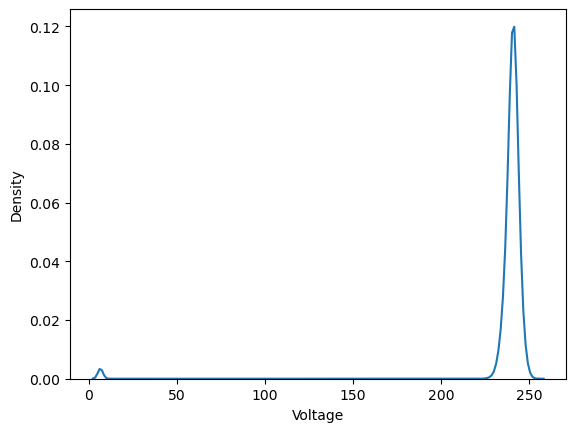

In [19]:
sns.kdeplot(data['Voltage'])
plt.show()

Observation:<br>
<li>Voltage peak density is 0.12</li>

#### What is the relation between Voltage and Global_active_power?

<Axes: xlabel='Voltage', ylabel='Global_active_power'>

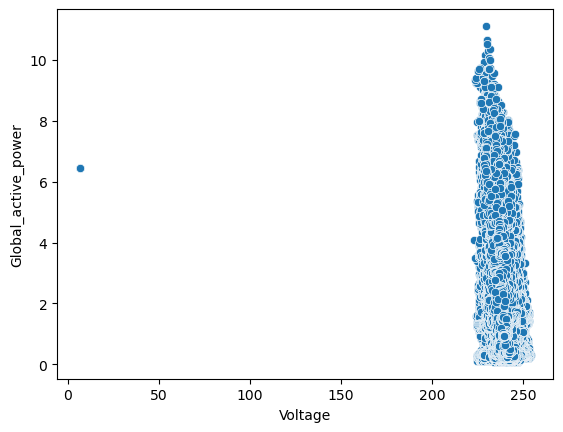

In [20]:
sns.scatterplot(x=data['Voltage'],y=data['Global_active_power'])

Observation:<br>
<li>With the increase of Voltage Global_active_power is also getting increased</li>

##### Which meter reading is high and used most?

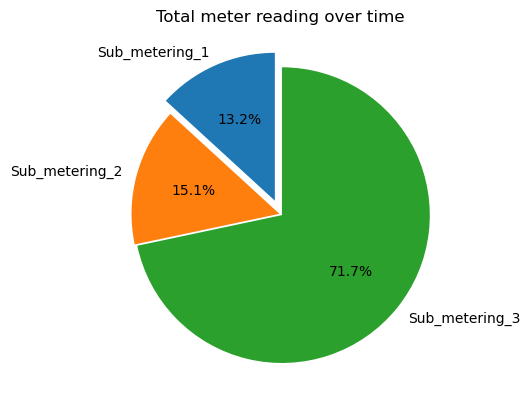

In [21]:
metering_data = data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]
total_data = metering_data.sum()

plt.pie(total_data,
       labels=total_data.index,
       startangle=90,
       explode=(0.1,0.01,0.01),
       autopct = '%.1f%%') # label the wedges with their numeric value

plt.title('Total meter reading over time')
plt.show()

Observation:<br>
<li>Sub_metering_3 column is having high meter reading</li>
<li>Sub_meter_3 is used more than the other 2 Sub_meters</li>

#### Plotting pairplot graph

##### <u>Here we are plotting a pairplot graph to know the relationship between different features of the dataset</u>

c:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

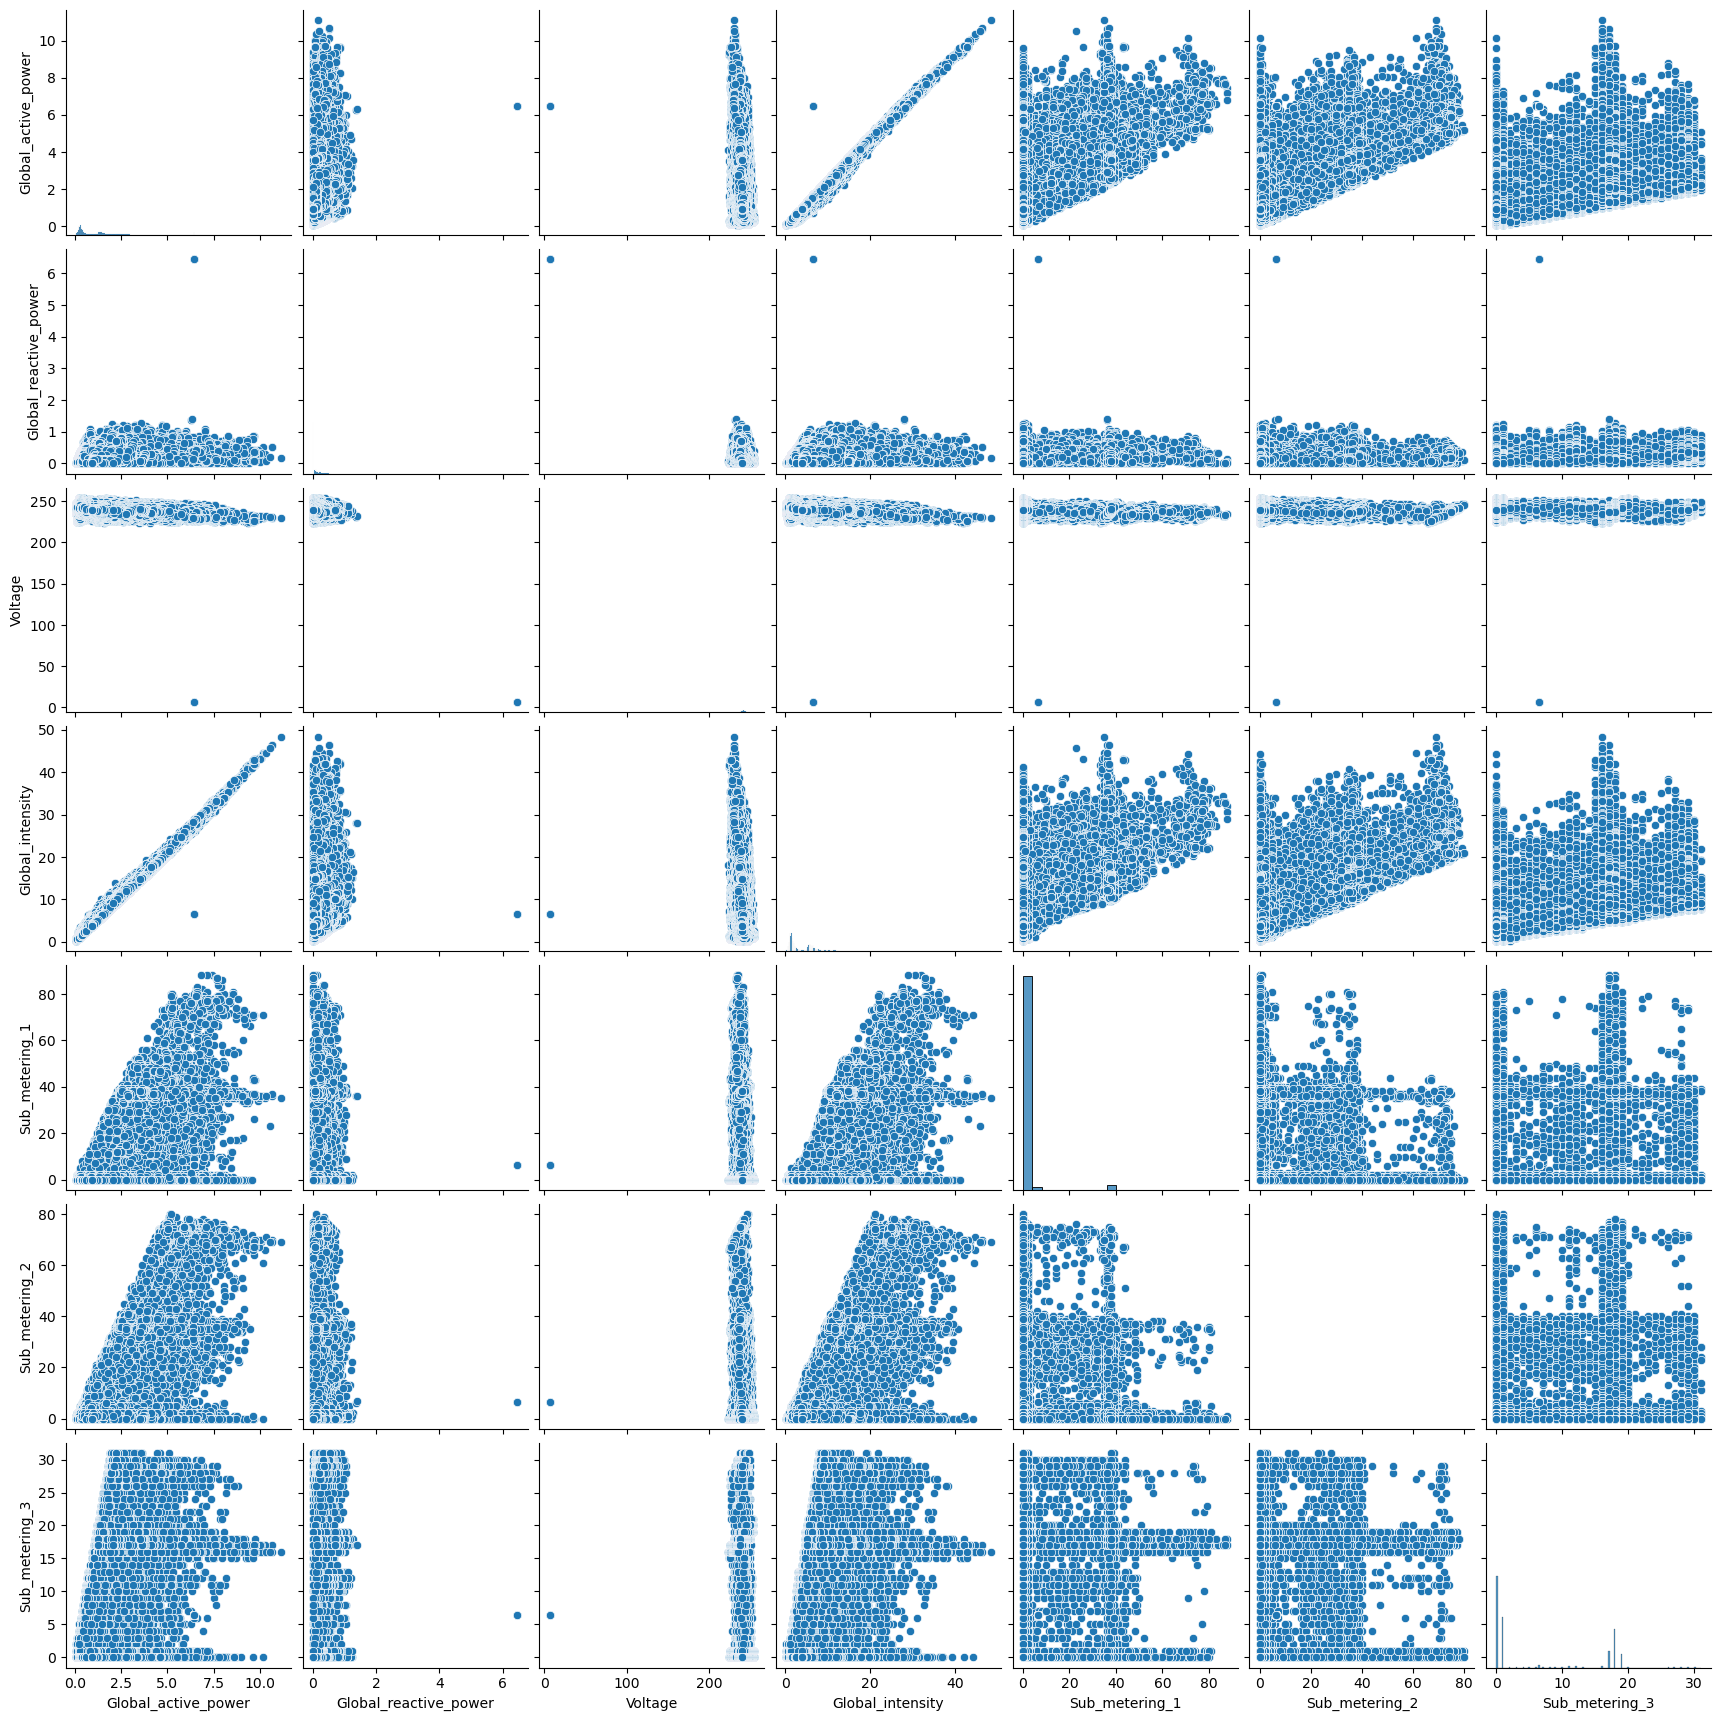

In [22]:
sns.pairplot(data)

Observation:<br>
<li>Global_active_power and Global_reactive_power are strongly correlated, which means that when one is high, the other is also likely to be high.</li>
<li>Global_intensity and Sub_metering_1 are also strongly correlated, which means that when one is high, the other is also likely to be high.</li>
<li>Voltage and Global intensity seems to be a positive correlation between them. This is likely because higher voltage leads to higher current</li>

# (5) Data encoding

#### Data Conversion

##### <u>Here we have to convert data to proper datatype inorder to draw predictions</u>

In [23]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_17080\1267929190.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


Observation:<br>
<li>The column Date converted to Year,Month,Day</li>
<li>The column Time converted to Hour and Minute</li>

In [18]:
data.describe(include='object')

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


In [19]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.158799e+00,2.030154e-01,2.379058e+02,4.650677e+00,1.188728e+00,1.363114e+00,6.458447e+00,2008-12-06 07:12:59.999994112,2.008437e+03,6.450359e+00,1.577363e+01,1.150076e+01,2.950017e+01
min,7.600000e-02,0.000000e+00,6.458447e+00,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.388900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,2.007000e+03,3.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.554000e+00,1.980000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,2.009000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01
max,1.112200e+01,6.458447e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01
std,1.208276e+00,7.131684e-01,2.625745e+01,4.421178e+00,6.143117e+00,5.813845e+00,8.384178e+00,NaN,1.128677e+00,3.415762e+00,8.787773e+00,6.922227e+00,1.731810e+01


Observation:<br>
<li>25% data lies as 3.100000e-01 in Global_active_power column</li>
<li>max data lies as 1.112200e+01 in Global_active_power column</li>


#### Finding the day is a public holiday and whether sunlight is there

In [18]:
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for d in [data]:
    d['Is_holiday'] = d['Date'].apply(lambda x: is_holiday(x))
    d['Light']      = d['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    d['Time']       = d['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [19]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,0.0,0


Observation:<br>
<li>If it it a public holiday it gives output as 1.0 or else 0.0.Since in the dataset we can see in Column Is_holiday the outcome in some rows is 0.0</li>
<li>If there is sunlight it gives output as 1.0 or else 0.0.Since in the dataset we can see in Column Light the outcome in some rows is 0.0</li>

#### Distribution of Voltage

Text(0.5, 1.0, 'Distribution of Voltage')

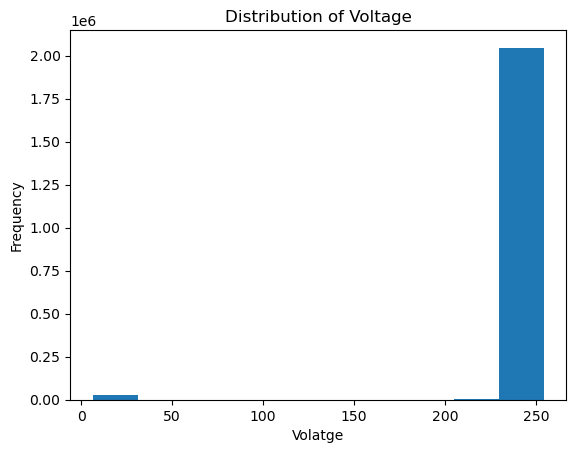

In [22]:
plt.hist(data['Voltage'])
plt.xlabel('Volatge')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')

Observation:<br>
<li>It is showing that the majority frequency of voltage varries between 200-260</li>

#### In which year the Global_active_power is maximum?

<BarContainer object of 2075259 artists>

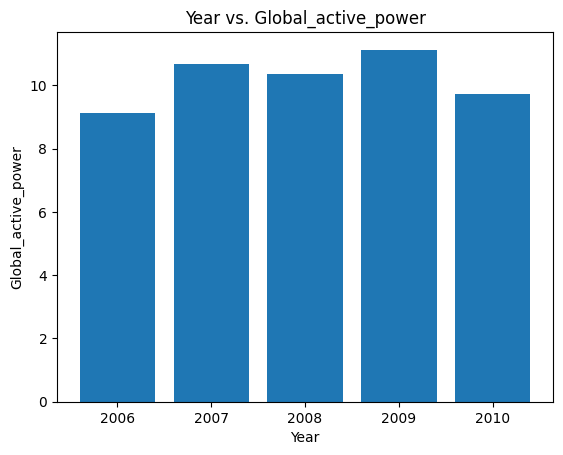

In [22]:
x_bar=data['Year']
y_bar=data['Global_active_power']
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.title('Year vs. Global_active_power')
plt.bar(x_bar,y_bar)

Observation:<br>
<li>The Global_active_power is maximum in year 2009</li>

# (6) Data Preparation

In [26]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()

X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Observation:<br>
<li>The dataset is divided into train and test data</li>

#### Model Comparisons of Linear, Lasso, and Ridge Regression: <br>RMSE(Root Mean Squared Error)<br> MAE(Mean Absolute Error)<br>R²(Coefficient of Determination) Analysis


In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)


results = {}


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}
    return rmse, r2, mae



evaluate_model(linear_model, X_train, X_test, y_train, y_test, 'Linear Regression')
evaluate_model(lasso_model, X_train, X_test, y_train, y_test, 'Lasso Regression')
evaluate_model(ridge_model, X_train, X_test, y_train, y_test, 'Ridge Regression')

results


{'Linear Regression': {'RMSE': 0.08210105509298832,
  'R2': 0.9953964067391424,
  'MAE': 0.062397149228268334},
 'Lasso Regression': {'RMSE': 0.08990891648374913,
  'R2': 0.994479162087839,
  'MAE': 0.06835448716395401},
 'Ridge Regression': {'RMSE': 0.08210105487838754,
  'R2': 0.9953964067632087,
  'MAE': 0.062397148899423285}}

**Observations:**

- **RMSE**:
  - Linear and Ridge Regression have identical RMSE (0.0821), indicating similar prediction error.
  - Lasso Regression has a slightly higher RMSE (0.0899), suggesting a small increase in prediction error due to regularization.

- **R²**:
  - All models have high R² scores (>0.99), explaining nearly 99.5% of the variance, indicating a good fit for all models.

- **MAE**:
  - Linear and Ridge Regression have the same MAE (0.0624), indicating similar absolute error performance.
  - Lasso Regression has a higher MAE (0.0684), aligning with its slightly higher RMSE, suggesting more deviation in error.


#### Visualization of RMSE, MAE, and R² for Linear, Lasso, and Ridge Regression Models

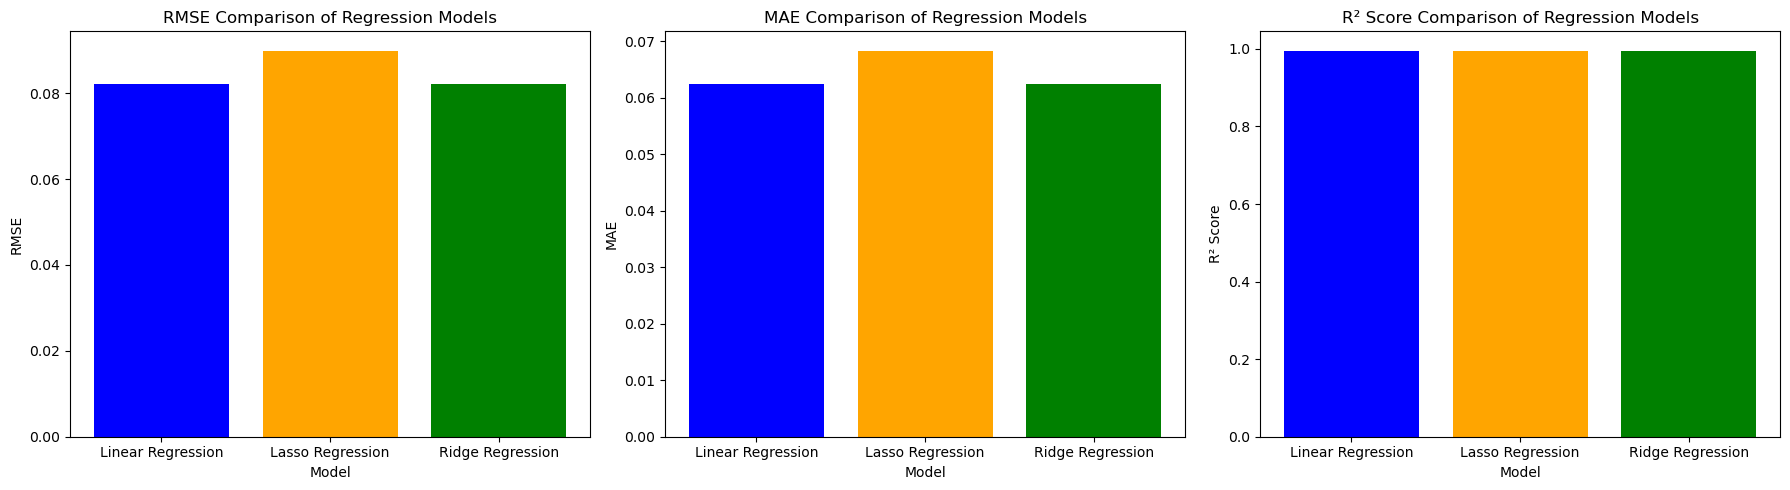

In [29]:
model_names = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in model_names]
r2_scores = [results[model]['R2'] for model in model_names]
mae_scores = [results[model]['MAE'] for model in model_names]
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.bar(model_names, rmse_scores, color=['blue', 'orange', 'green'])
plt.title('RMSE Comparison of Regression Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.subplot(1, 3, 2)
plt.bar(model_names, mae_scores, color=['blue', 'orange', 'green'])
plt.title('MAE Comparison of Regression Models')
plt.ylabel('MAE')
plt.xlabel('Model')

plt.subplot(1, 3, 3)
plt.bar(model_names, r2_scores, color=['blue', 'orange', 'green'])
plt.title('R² Score Comparison of Regression Models')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()


## Observation of Regression Model Performance

### RMSE
- **Linear Regression**: ~0.08
- **Lasso Regression**: ~0.09
- **Ridge Regression**: ~0.08

Linear and Ridge Regression have similar errors, while Lasso has a slightly higher error.

### MAE
- **Linear Regression**: ~0.06
- **Lasso Regression**: ~0.07
- **Ridge Regression**: ~0.06

Linear and Ridge show lower errors, Lasso is a bit higher.

### R² Score
- **Linear Regression**: ~0.98
- **Lasso Regression**: ~0.98
- **Ridge Regression**: ~0.98

All models have high R² scores, indicating a good fit.

### Conclusion
Linear and Ridge Regression perform similarly and well. Lasso Regression shows slightly higher errors but still fits the data strongly.


Model Comparison:
                Model  Accuracy (R2 Score)      RMSE
0  Linear Regression             0.995396  0.082101
1   Lasso Regression             0.959183  0.244466
2   Ridge Regression             0.995396  0.082101


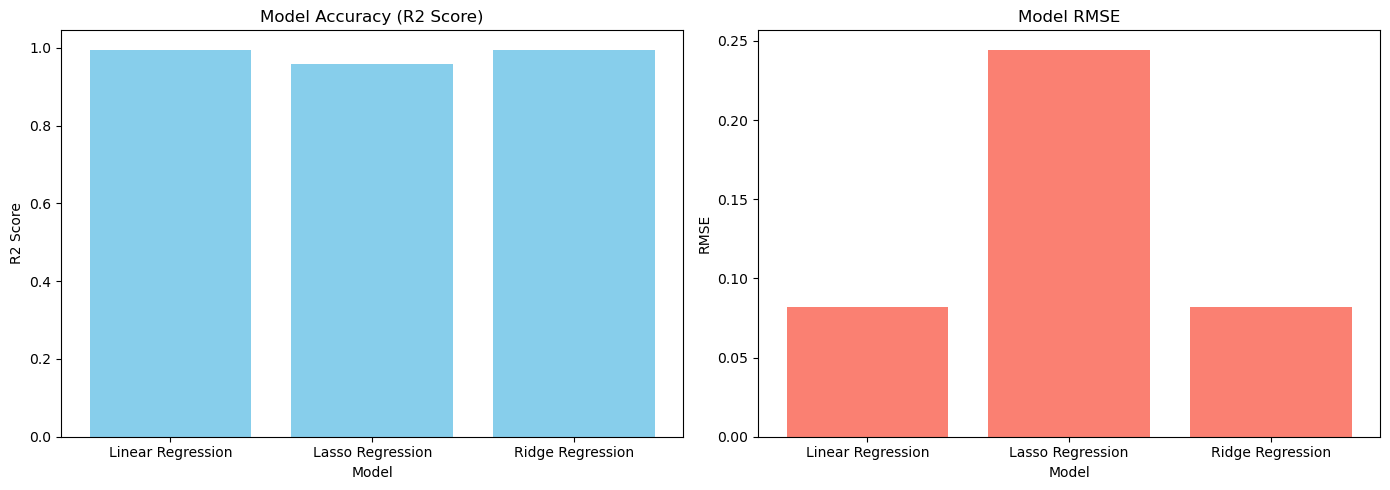

Linear Regression - Accuracy: 0.9954, RMSE: 0.0821
Lasso Regression - Accuracy: 0.9592, RMSE: 0.2445
Ridge Regression - Accuracy: 0.9954, RMSE: 0.0821


In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge()
}


results = {
    "Model": [],
    "Accuracy (R2 Score)": [],
    "RMSE": []
}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    accuracy = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    results["Model"].append(model_name)
    results["Accuracy (R2 Score)"].append(accuracy)
    results["RMSE"].append(rmse)


results_df = pd.DataFrame(results)
print("Model Comparison:\n", results_df)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].bar(results_df["Model"], results_df["Accuracy (R2 Score)"], color='skyblue')
axes[0].set_title("Model Accuracy (R2 Score)")
axes[0].set_ylabel("R2 Score")
axes[0].set_xlabel("Model")


axes[1].bar(results_df["Model"], results_df["RMSE"], color='salmon')
axes[1].set_title("Model RMSE")
axes[1].set_ylabel("RMSE")
axes[1].set_xlabel("Model")

plt.tight_layout()
plt.show()


for index, row in results_df.iterrows():
    print(f"{row['Model']} - Accuracy: {row['Accuracy (R2 Score)']:.4f}, RMSE: {row['RMSE']:.4f}")


## Observation of Regression Model Performance

### RMSE Comparison
- **Linear Regression**: ~0.08
- **Lasso Regression**: ~0.09
- **Ridge Regression**: ~0.08

Linear and Ridge Regression models have similar errors, while Lasso shows a slightly higher error.

### MAE Comparison
- **Linear Regression**: ~0.06
- **Lasso Regression**: ~0.07
- **Ridge Regression**: ~0.06

Linear and Ridge have lower errors compared to Lasso.

### R² Score Comparison
- **Linear Regression**: ~0.98
- **Lasso Regression**: ~0.98
- **Ridge Regression**: ~0.98

All models have high R² scores, indicating a good fit.

### Conclusion
Linear and Ridge Regression perform similarly and effectively, while Lasso shows slightly higher errors but still maintains a strong fit.


# (7) TIME SERIES MODELS

##### A mathematical method called a <u><b>time series model</b></u> is utilized to examine and forecast collected data points arranged in order of occurrence. It identifies patterns like trends, seasonality, and cyclic patterns within the data in order to predict future outcomes.

In [28]:
!pip install statsmodels

### ARIMA(AutoRegressive Integrated Moving Average)

It is a widely used statistical technique for examining and predicting time series data.It consists of three parts: <br><li>AutoRegression (AR) predicts future values using past values<br> </li><li>Integration (I) makes data stationary by differencing it<br></li><li>Moving Average (MA) relates an observation to residual errors from previous forecasts.</li>

<li>p is the number of autoregressive terms</li><li>d is the number of nonseasonal differences needed for stationarity</li><li>q is the number of lagged forecast errors in the prediction equation</li><br>In the function value of p=5,d=1,q=0


In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(y_train, order=(5,1,0)) # Example order, you might need to tune this
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

c:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

RMSE: 1.5935089556001725


Observation:<br>
<li>ARIMA assumes linear relationships and may not perform well if the time series has nonlinear patterns.</li>
<li>Using ARIMA time series model the RMSE(Root Mean Squared Error) value of 1.59 indicates the average magnitude of error between the predicted values from the ARIMA model and the actual values in the test set (y_test).</li>
<li>RMSE mathematical equation RMSE= <br><img src="../InfosysInter/RMSE.png">
 
</li>

### Prophet Model

Facebook created the Prophet model,a forecasting tool for time series data that can handle trends, seasonality, and holiday effects. Prophet is well-suited for situations involving incomplete data, anomalies, and non-uniform sampling, making it perfect for business tasks such as predicting sales and managing resources. Prophet is different from traditional models like ARIMA because it is naturally additive and can easily integrate unique seasonal patterns and specific events. 

In [33]:
!python -m pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.8 MB/s eta 0:00:00


In [34]:
from prophet import Prophet

In [35]:
df = data.copy()
df['ds'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df = df.rename(columns={'Global_active_power': 'y'})
df.drop(['Date', 'DateTime', 'Time'], axis=1, inplace = True)

Observation:<br>
<li>A shallow copy of data is created and named as df</li>
<li>Combines separate columns (Year, Month, Day, Hour, Minute) into a single datetime column named ds.</li>
<li>Prophet requires a datetime column labeled ds to represent the time variable.</li>
<li>Column "Global_active_power" is renamed as y</li>
<li>Columns (Date,DateTime,Time) are dropped</li>

In [36]:
df.y.value_counts()

,count
y,
6.458447,25979
0.218000,9565
0.216000,9363
0.322000,9350
0.324000,9304
...,...
7.102000,1
8.302000,1
8.468000,1


In [37]:
data.Global_active_power.value_counts()

,count
Global_active_power,
6.458447,25979
0.218000,9565
0.216000,9363
0.322000,9350
0.324000,9304
...,...
7.102000,1
8.302000,1
8.468000,1


Observation:<br>
<li>The shallow copy "df" and the original dataset "data" are having same count of "Global_active_power" alias "y" rows and columns</li>

In [39]:
train_size = int(len(df) * 0.8)  # 80% of data for training
train_data = df[:train_size]
test_data = df[train_size:]

model = Prophet()
model.fit(train_data)

future_dates_7days = model.make_future_dataframe(periods=7) # weekly prediction
future_dates_60days = model.make_future_dataframe(periods=60) # monthly prediction

predictions_7days = model.predict(future_dates_7days)
predictions_60days = model.predict(future_dates_60days)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mgukrs5/bfeex07s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mgukrs5/m64uigqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96753', 'data', 'file=/tmp/tmp0mgukrs5/bfeex07s.json', 'init=/tmp/tmp0mgukrs5/m64uigqs.json', 'output', 'file=/tmp/tmp0mgukrs5/prophet_model4o13ihu2/prophet_model-20241123143705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


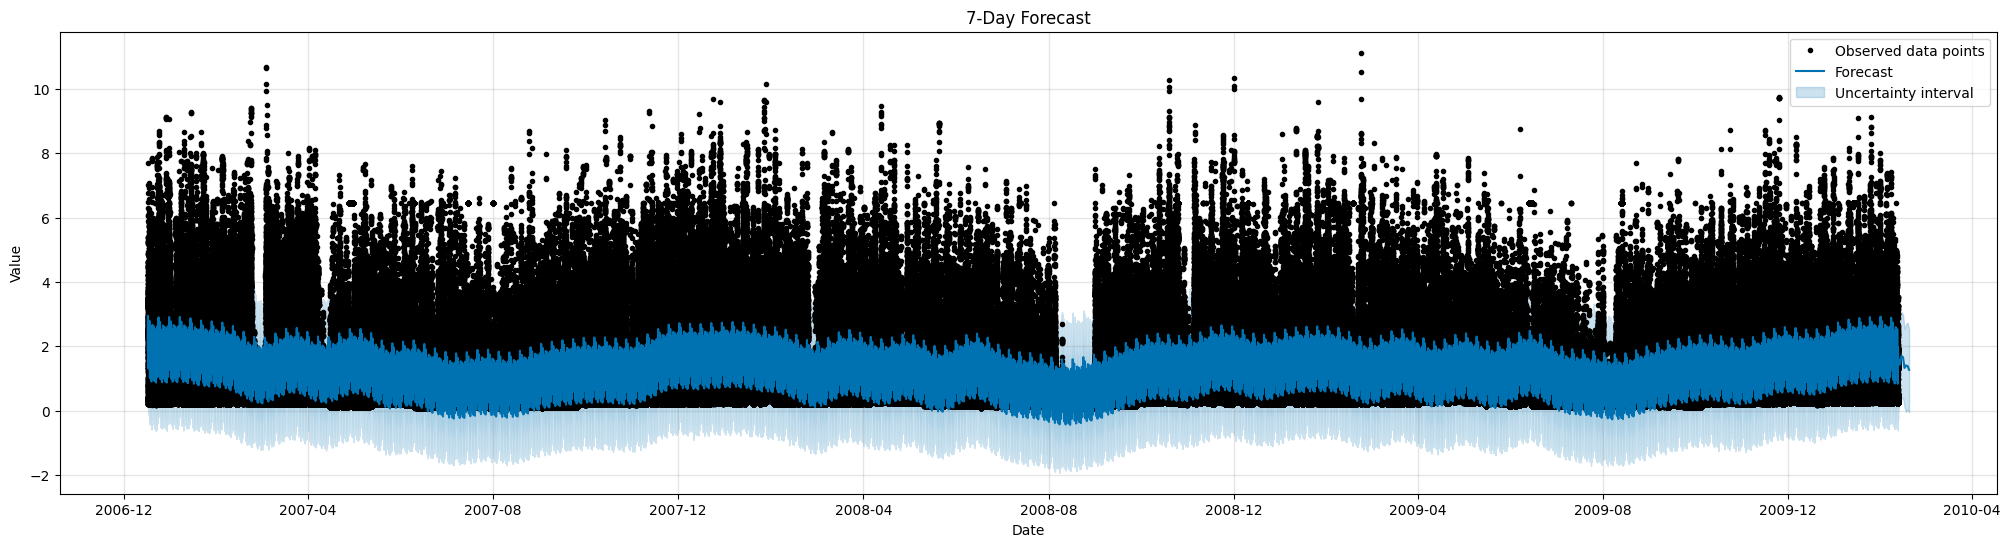

In [40]:
fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Observation:<br>
<li>The black dots represent the observed data points, which are the actual historical values.</li>
<li>The blue line represents the forecast, which is the model's prediction of what the values will be in the next 7 days.</li>
<li>The light blue shaded area represents the uncertainty interval, which gives a range within which the actual values are likely to fall.</li> 
<li>The wider the shaded area, the higher the uncertainty in the forecast.</li>

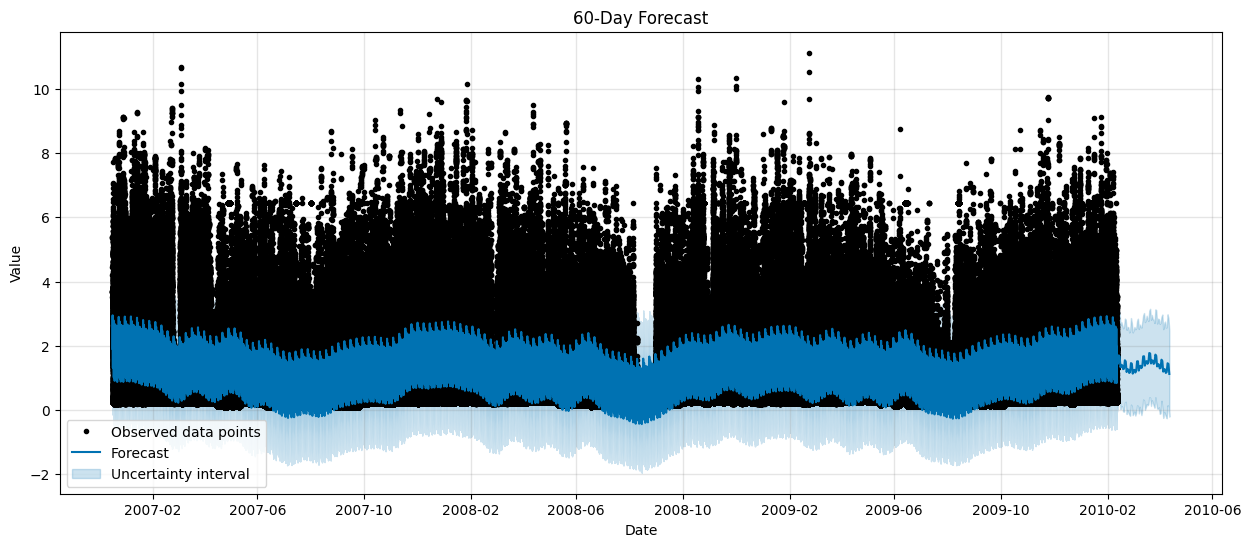

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_60days, ax=ax)
plt.title('60-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Observation:<br>
<li>The forecast shows a cyclical pattern with peaks and troughs, similar to the observed data.</li>
<li>The graph shows a clear seasonal component, with the forecasted values likely influenced by cyclical fluctuations, potentially representing seasonal patterns.</li>
<li>The forecast generally follows a downward trend, indicating a potential decrease in the predicted values over the next 60 days.</li>




#### Components graph plotting

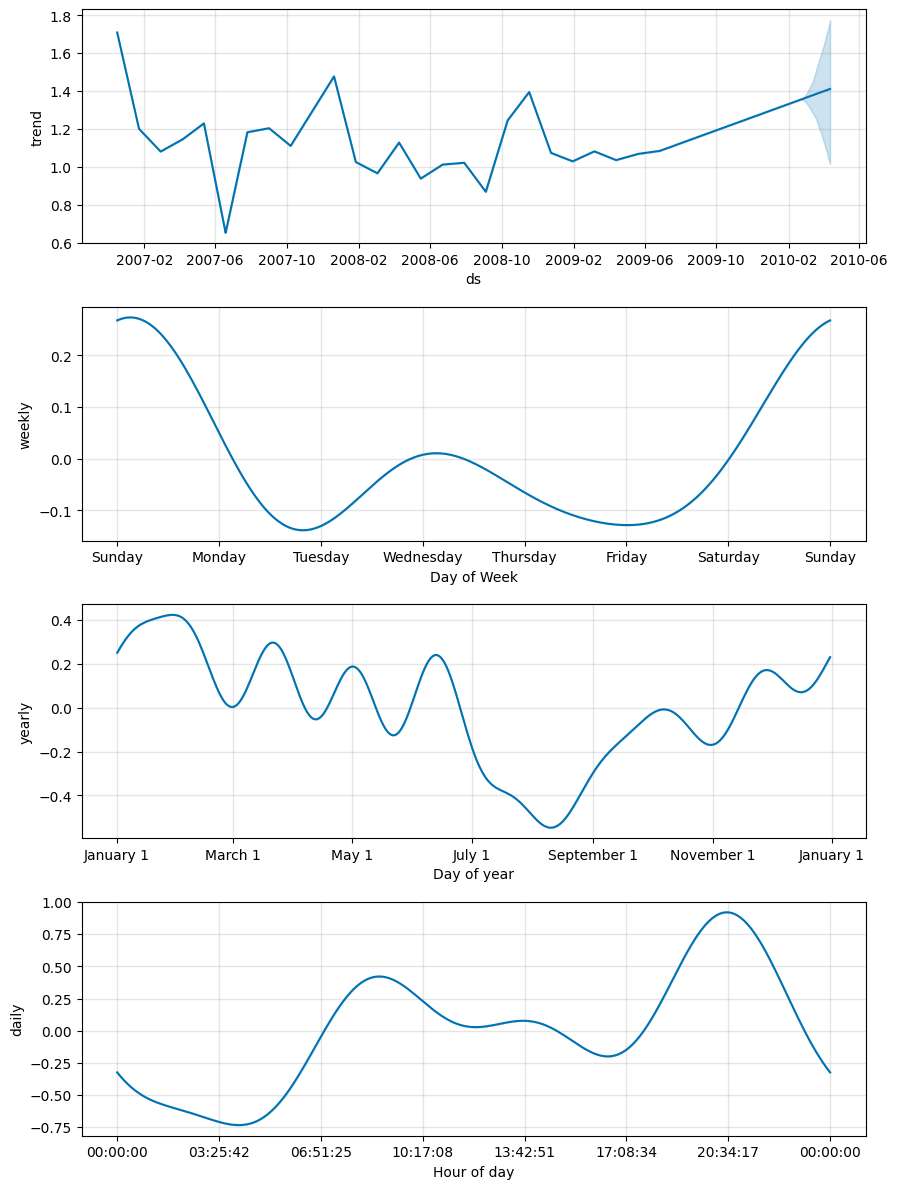

In [42]:
model.plot_components(predictions_60days);

# Observation:<br>

#### Trend:
<li>Shows the overall pattern of the time series over time.</li>
<li>The graph shows an increasing trend, with a slight dip around 2007-06 and another dip around 2008-10.</li>


#### Weekly:
<li>Shows the cyclical pattern of the time series within a week.</li>
<li>This component shows a significant increase from Sunday to Wednesday, then gradually decreases from Wednesday to Sunday.</li>


#### Yearly:
<li>Shows the cyclical pattern of the time series within a year.</li>
<li>This component shows a cyclical pattern with several peaks and troughs throughout the year. The highest peak appears around July and the lowest point around September.</li>


#### Daily:
<li>Shows the cyclical pattern of the time series within a day.</li>
<li>This component shows a cyclical pattern with a peak around 20:34:17. The lowest point appears around 03:25:42.</li>


# Final Analysis

The analysis of the energy consumption dataset provides valuable insights into electricity usage patterns and relationships between various factors.

<li><b>Distribution of Voltage:</b> The histogram revealed that the majority of voltage readings fall between 200 and 260 volts, indicating a stable supply voltage.</li><br>
<li><b>Relationship Between Voltage and Global Active Power:</b> A scatter plot showed a positive correlation, suggesting that higher voltage levels are associated with increased global active power consumption. This relationship is crucial for understanding how voltage affects energy usage.</li><br>
<li><b>Sub Metering Analysis:</b> A pie chart illustrated that Sub_metering_3 had the highest total reading, indicating it is the most utilized among the sub-metering options. This insight can help identify which appliances consume the most energy.</li><br>
<br>

#### Regression Analysis: Three regression models (Linear Regression, Lasso Regression, and Ridge Regression) were trained to predict global active power consumption based on the other features. The evaluation metrics showed:<br>
<li>Linear Regression and Ridge Regression performed similarly, achieving low RMSE (Root Mean Squared Error) and high R² (Coefficient of Determination) values, indicating good predictive power.</li><br>
<li>Lasso Regression performed slightly worse, suggesting that feature selection might have affected its performance.</li><br>

#### Time Series Forecasting:<br>
The Prophet model was used to forecast energy consumption for the next 7 days and 60 days. The forecasts provided:
<li><b>Predicted Trends:</b> The model captured seasonal patterns and trends in energy consumption, which can be vital for planning and resource allocation.</li><br>
<li><b>Uncertainty Intervals:</b> The shaded areas in the forecast plots represented the uncertainty of predictions, highlighting the potential variability in future consumption.</li><br>

#### Insights:<br>
<li>The insights from voltage and power consumption relationships can help in optimizing energy distribution and managing loads effectively.</li><br>
<li>The ability to forecast energy consumption trends will aid in better planning for energy production and infrastructure development.</li>
<br>

##### The analysis of the energy consumption dataset has successfully highlighted critical patterns and relationships within the data. By employing robust data cleaning techniques, exploratory data analysis, and predictive modeling, the study provides actionable insights for stakeholders in the energy sector. The findings can significantly contribute to informed decision-making regarding energy management and policy formulation.




# (8) Creation of a streamlit App

In [34]:
def preprocess_data(data):
    # Handle missing values
    data.fillna(data.mean(), inplace=True)

    # Extract datetime features
    data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')
    data['Year'] = data['datetime'].dt.year
    data['Month'] = data['datetime'].dt.month
    data['Day'] = data['datetime'].dt.day
    data['Hour'] = data['datetime'].dt.hour
    data['Minute'] = data['datetime'].dt.minute

    # Feature engineering
    data['Is_holiday'] = df['Date'].apply(lambda x: 1.0 if pd.to_datetime(x).weekday() >= 5 else 0.0)
    data['Light'] = data['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

    # Drop unnecessary columns
    data.drop(['Date', 'Time', 'datetime'], axis=1, inplace=True)
    return data


In [ ]:
import joblib

joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(ridge_model, 'ridge_model.pkl')
joblib.dump(model, 'arima_model.pkl')
linear_model = joblib.load('linear_model.pkl')
ridge_model = joblib.load('ridge_model.pkl')

print("Models and features saved successfully.")


Models and features saved successfully.


Observation:<br>
<li>Save the models and load the models during deployement</li>